In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Different dictance/similarity measure

##Manhattan distance

In [ ]:
def manhattan_dictance(data1, data2):
    return sum(abs(x-y) for x, y in zip (data1, data2))
    ''' 
    # diferent approach can be
    ## number of features or dimensions
    n = len(data1)
    summ = 0
    for x, y in zip(data1, data2):
        summ += abs(x,y)
    
    return summ
    '''

print( manhattan_dictance( [1, 6.55, 5.3],[2,4,6] ) )

4.25


##Euclidean distance

In [ ]:
def euclidean_dictance(data1 = [0], data2 = [0]):
    return math.sqrt( sum( (x-y)**2 for x, y in zip(data1, data2) ) )

print(euclidean_dictance([1,2],[2,4]))

2.23606797749979


##Task 1: Minkowski distance:
write a function for this distance


In [ ]:
def minkowski_dictance(data1, data2, power=1):
    summ = sum( pow( abs(x-y), power) for x, y in zip(data1, data2) )
    return pow( summ , 1/power )

print(minkowski_dictance([1,2], [2,4], power=2))

2.23606797749979


##Task 2: Hamming distance:
write a function for this distance



In [ ]:
def hamming_dictance(data1, data2):
    ## number of features or dimensions
    n = len(data1)
    return ( sum(abs(x-y) for x, y in zip (data1, data2)) )/n

print(hamming_dictance( [1, 6.55, 5.3],[2,4,6] ))

1.4166666666666667


##Cosine similarity:




In [ ]:
def cosine_similarity(data1, data2):
    #dot product of two vector a.b => data1.data2
    numaritor = sum( x*y for x, y in zip(data1, data2) )

    #norms of each vectors
    norm_data1 = math.sqrt( sum( x*x for x in data1 ) )
    norm_data2 = math.sqrt( sum( x*x for x in data2 ) )

    denominator = norm_data1*norm_data2

    return numaritor/denominator

print(cosine_similarity( [1, 6.55, 5.3],[2,4,6] ))

0.9449604004923451


##Jacard similarity

In [ ]:
def jacard_similarity(data1, data2):
    a = set(data1)
    b = set(data2)

    numerator = len( a.intersection(b) )
    denominator = len( a.union(b) )

    return numerator/denominator

print(jacard_similarity(["the", "sky", "is", "blue"], ["the", "sky", "looks", "cludy", "today"]))

0.2857142857142857


#knn method

In [ ]:
def find_neighbours(x_train, x, k,  dist_func):
    neighbours = []
    distances = []
    #find distances of x with all data points in the trainig data
    for i in range(len(x_train)):
        d = dist_func(x, x_train[i])
        #######################################################################
        ####### here, i is used for saving the index of the data.....##########
        distances.append( [i, d] )

    #### sort all the data based on distance
    distances.sort( key = lambda data:data[1] )
    return distances[ :k]



def find_class(x_train, y_train, x, k, dist_func):
    neighbours = find_neighbours(x_train, x, k,  dist_func)
    # print(neighbours)
    #count_votes
    ####### here i[0] is the ibedx for a data, we check the class of the data using this idex
    neighbours_classes = [y_train[i[0]] for i in neighbours]
    # print(neighbours_classes)

    predicted_class = max ( set(neighbours_classes) , key= neighbours_classes.count)
    #fid max vote type, find class label
    return predicted_class



def knn(x_train, y_train, x_test, y_test, k , dist_func):
    predictions = []
    for x in x_test:
        pred = find_class(x_train, y_train, x, k, dist_func)
        predictions.append(pred)
    
    correct_prediction = 0
    for p, t in zip( predictions, y_test ):
        if p == t: correct_prediction += 1

    accuracy = correct_prediction/len(y_test)
    return accuracy

#Load Iris dataset

In [ ]:
iris_df = pd.read_csv("iris.csv")
# print(iris_df.head())
# print(iris_df.describe())
# print(iris_df.shape)


iris_df.Species
## find row wise datas
setosa = iris_df[ iris_df.Species == "Iris-setosa" ]
versicolor = iris_df[ iris_df.Species == "Iris-versicolor" ]
virginica = iris_df[ iris_df.Species == "Iris-virginica" ]
# print( setosa, "\n", type(setosa), len(setosa))
# print( versicolor, "\n", type(versicolor), len(versicolor))
# print( virginica, "\n", type(virginica), len(virginica))

##### particu;ar value ad slicing the dataframe
print(iris_df.iloc[0])
setosa = iris_df.iloc[0:50]
# print( setosa, "\n", type(setosa), len(setosa))

print(  )
print( iris_df.Species.unique() )
print( iris_df.Species.value_counts() )

Id                         1
SepalLengthCm            5.1
SepalWidthCm             3.5
PetalLengthCm            1.4
PetalWidthCm             0.2
Species          Iris-setosa
Name: 0, dtype: object

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64


## Pichart

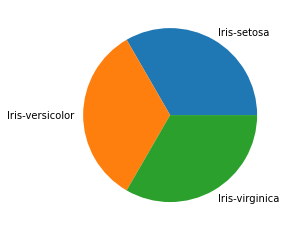

In [ ]:
plt.pie( iris_df.Species.value_counts(),  labels = iris_df.Species.unique() )
plt.show()

#Distiribution of the feature values using histrogram

##Univariate analysis


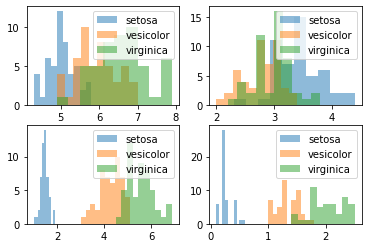

In [ ]:


plt.subplot(2, 2, 1)
plt.hist(setosa['SepalLengthCm'], label= 'setosa', alpha = 0.5)
plt.hist(versicolor['SepalLengthCm'], label= 'vesicolor', alpha = 0.5)
plt.hist(virginica['SepalLengthCm'], label= 'virginica', alpha = 0.5)
plt.legend(loc= 'upper right')

plt.subplot(2, 2, 2)
plt.hist(setosa['SepalWidthCm'], label= 'setosa', alpha = 0.5)
plt.hist(versicolor['SepalWidthCm'], label= 'vesicolor', alpha = 0.5)
plt.hist(virginica['SepalWidthCm'], label= 'virginica', alpha = 0.5)
plt.legend(loc= 'upper right')

plt.subplot(2, 2, 3)
plt.hist(setosa['PetalLengthCm'], label= 'setosa', alpha = 0.5)
plt.hist(versicolor['PetalLengthCm'], label= 'vesicolor', alpha = 0.5)
plt.hist(virginica['PetalLengthCm'], label= 'virginica', alpha = 0.5)
plt.legend(loc= 'upper right')

plt.subplot(2, 2, 4)
plt.hist(setosa['PetalWidthCm'], label= 'setosa', alpha = 0.5)
plt.hist(versicolor['PetalWidthCm'], label= 'vesicolor', alpha = 0.5)
plt.hist(virginica['PetalWidthCm'], label= 'virginica', alpha = 0.5)
plt.legend(loc= 'upper right')

##Bi-variate analysis
###Check the last two pair wise analysis


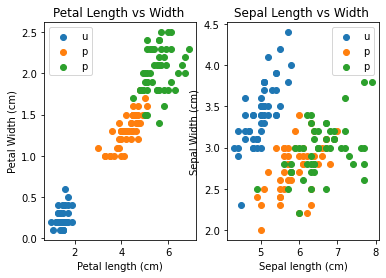

In [ ]:
# plt.scatter(iris_df['PetalLengthCm'], iris_df['PetalWidthCm'])
plt.subplot(1, 2, 1)
plt.scatter(setosa['PetalLengthCm'], setosa['PetalWidthCm'], label= 'setosa')
plt.scatter(versicolor['PetalLengthCm'], versicolor['PetalWidthCm'], label = 'versicolor')
plt.scatter(virginica['PetalLengthCm'], virginica['PetalWidthCm'], label = 'virgiica')
plt.legend('upper left')
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Petal Length vs Width ")


plt.subplot(1, 2, 2)
plt.scatter(setosa['SepalLengthCm'], setosa['SepalWidthCm'], label= 'setosa')
plt.scatter(versicolor['SepalLengthCm'], versicolor['SepalWidthCm'], label = 'versicolor')
plt.scatter(virginica['SepalLengthCm'], virginica['SepalWidthCm'], label = 'virgiica')
plt.legend('upper left')
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Sepal Length vs Width ")


plt.show()

##Task3: check all the pairwise scatter plot

#Data division/spliting
train = 70
test = 30

In [ ]:
indicies = np.random.permutation(5)
print(indicies)

[4 1 3 0 2]


In [ ]:
# total number of sample/instances
n_sample = iris_df.shape[0]

# use 70% data to train
n_traning = int(n_sample * .7)

#generate random choices 
### suffle the indices
np.random.seed(1)
indices = np.random.permutation(n_sample) ## create a random permutaion of (0 to n_sample range)
train_id = indices[ :n_traning] ## take first 70% random indices 
test_id = indices[n_traning: ]  ## take the rest 30% random indices 

# print(train_id)

# pick data using tha random choices
iris_train = iris_df.iloc[train_id]
iris_test = iris_df.iloc[test_id]
# print(iris_train)

# pick the actual 4 features, exlude the id column and divide the label/class colunm from the features
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x_train = iris_train[features].values
y_train = iris_train['Species'].values

x_test = iris_test[features].values
y_test = iris_test['Species'].values

# print(x_test)
# print(y_test)


#Make prediction

In [ ]:
k = 5
## we can pass the method nate too in python
dist_func = euclidean_dictance 
accuracy = knn(x_train, y_train, x_test, y_test, k , dist_func )
print("accuracy of knn for k =", k, " is", accuracy)

accuracy of knn for k = 5  is 0.9333333333333333


#Debug

In [ ]:
ed = euclidean_dictance( [0,0,0,1], [1,1,1,1])
print(ed)


x_tr = [ [0,0,0,0],[1,1,1,1],[2,2,2,2],[3,3,3,3] ]
y_tr = ['setosa','versicolor','setosa','virginica']
x = [1,1,1,1]
k = 3
dist_func = euclidean_dictance
neigh = find_neighbours(x_tr, x, k, dist_func )
print(neigh)

c = find_class(x_tr, y_tr, x, k, dist_func = euclidean_dictance)
print(c)

1.7320508075688772
[[1, 0.0], [0, 2.0], [2, 2.0]]
setosa


#Knn classification using built in libraries.

The following codes are from
https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_knn_algorithm_finding_nearest_neighbors.htm

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

dataset = pd.read_csv(path, names = headernames)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

# print(X, type(X))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)

# print(X_train[:1], type(X_train))


# print( [x[0] for x in X_train] )
# print( [y for y in y_train] )

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# X2 = scaler.transform(X)

# print(X_train, type(X_train))

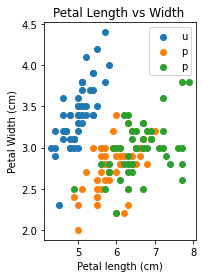

In [ ]:
# plt.scatter(iris_df['PetalLengthCm'], iris_df['PetalWidthCm'])
plt.subplot(1, 2, 1)
plt.scatter([x[0] for x in X[0:50]] , [x[1] for x in X[0:50]])
plt.scatter([x[0] for x in X[50:100]] , [x[1] for x in X[50:100]])
plt.scatter([x[0] for x in X[100:150]] , [x[1] for x in X[100:150]])
# plt.scatter(versicolor['SepalLengthCm'], versicolor['SepalWidthCm'], label = 'versicolor')
# plt.scatter(virginica['SepalLengthCm'], virginica['SepalWidthCm'], label = 'virgiica')

plt.legend('upper left')
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Petal Length vs Width ")





# plt.subplot(1, 2, 2)
# plt.scatter([x[0] for x in X2[0:50]] , [x[1] for x in X2[0:50]])
# plt.scatter([x[0] for x in X2[50:100]] , [x[1] for x in X2[50:100]])
# plt.scatter([x[0] for x in X2[100:150]] , [x[1] for x in X2[100:150]])

# plt.scatter(setosa['SepalLengthCm'], setosa['SepalWidthCm'], label= 'setosa')
# plt.scatter(versicolor['SepalLengthCm'], versicolor['SepalWidthCm'], label = 'versicolor')
# plt.scatter(virginica['SepalLengthCm'], virginica['SepalWidthCm'], label = 'virgiica')
# plt.legend('upper left')
# plt.xlabel("Sepal length (cm)")
# plt.ylabel("Sepal Width (cm)")
# plt.title("Sepal Length vs Width ")


plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[21  0  0]
 [ 0 22  0]
 [ 0  2 15]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        21
Iris-versicolor       0.92      1.00      0.96        22
 Iris-virginica       1.00      0.88      0.94        17

       accuracy                           0.97        60
      macro avg       0.97      0.96      0.96        60
   weighted avg       0.97      0.97      0.97        60

Accuracy: 0.9666666666666667
